### Context ###

The data consists of measurements made on patients with malignant melanoma. Each patient
had their tumour removed by surgery at the Department of Plastic Surgery, University Hospital
of Odense, Denmark during the period 1962 to 1977. The surgery consisted of complete
removal of the tumour together with about 2.5cm of the surrounding skin.
Among the measurements taken were the thickness of the tumour and whether it was
ulcerated or not. These are thought to be important prognostic variables in that patients with a
thick and/or ulcerated tumour have an increased chance of death from melanoma. Patients
were followed until the end of 1977. The data frame contains the following columns.

• time - Survival time in days since the operation.

• status - The patients status at the end of the study

1 indicates that they had died from melanoma, 2 indicates that they were still alive and 3
indicates that they had died from causes unrelated to their melanoma.

• sex - The patients sex; 1=male, 0=female.

• age - Age in years at the time of the operation.

• year - Year of operation.

• thickness - Tumour thickness in mm.

• ulcer - Indicator of ulceration; 1=present, 0=absent

## Task
As a data scientist, you are tasked to ask salient questions,analyse the data and report your findings. 





## OBJECTIVES

The objectives of the analysis are to:
* compare average survival time of ulceration to average survival time without ulceration 
* compare average tumor thickness of living patients to average tumor thickness of patients who died of melanoma
* compare average tumor thickness of ulceration to average tumor thickness without ulceration 
* compare average tumor thickness of male patients to average tumor thickness of female patients
* compare average survival time of male patients to average survival time of female patients
* check the relationship between ulceration and status
* check the relationship between ulceration and sex






In [1]:
#importing packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats 
import pingouin
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
df=pd.read_csv('melanoma.csv')

In [3]:
df.head()

,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       205 non-null    int64  
 1   status     205 non-null    int64  
 2   sex        205 non-null    int64  
 3   age        205 non-null    int64  
 4   year       205 non-null    int64  
 5   thickness  205 non-null    float64
 6   ulcer      205 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.3 KB


In [5]:
df['status']=df['status'].astype('str')
df['sex']=df['sex'].astype('str')
df['year']=df['year'].astype('str')
df['ulcer']=df['ulcer'].astype('str')

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

time         0
status       0
sex          0
age          0
year         0
thickness    0
ulcer        0
dtype: int64

In [8]:
df.shape

(205, 7)

In [9]:
df.describe(include=np.number)

,time,age,thickness
count,205.000000,205.000000,205.000000
mean,2152.800000,52.463415,2.919854
std,1122.060667,16.671711,2.959433
min,10.000000,4.000000,0.100000
25%,1525.000000,42.000000,0.970000
50%,2005.000000,54.000000,1.940000
75%,3042.000000,65.000000,3.560000
max,5565.000000,95.000000,17.420000


In [10]:
df.describe(include='object')

,status,sex,year,ulcer
count,205,205,205,205
unique,3,2,13,2
top,2,0,1972,0
freq,134,126,41,115


## Univariate Analysis

In [11]:
df['time'].describe()

count     205.000000
mean     2152.800000
std      1122.060667
min        10.000000
25%      1525.000000
50%      2005.000000
75%      3042.000000
max      5565.000000
Name: time, dtype: float64

Text(0.5, 1.0, 'Boxplot of Survival Time With Ulcer')

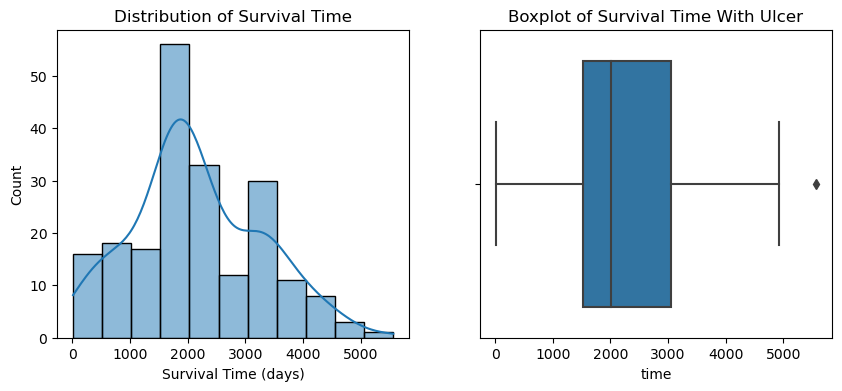

In [12]:
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x='time',data=df, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Survival Time')
ax[0].set_xlabel('Survival Time (days)')


sns.boxplot(x='time',data=df, ax=ax[1])
ax[1].set_title('Boxplot of Survival Time With Ulcer')

The distribution of survival time is normal with few outliers

In [13]:
sorder=df['status'].value_counts().sort_values().index
df['status'].value_counts(normalize=True)

status
2    0.653659
1    0.278049
3    0.068293
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Count of Status')

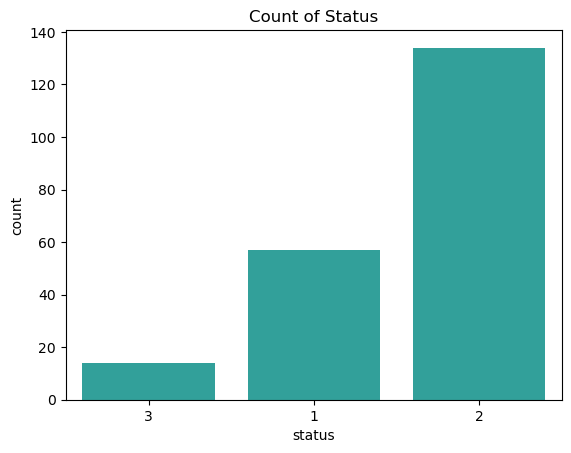

In [14]:
sns.countplot(x='status', data=df, color='lightseagreen', order=sorder)
plt.title('Count of Status')

The number of patients still alive is the greatest and the number of patients who died from other causes than melanoma is the least.

In [15]:
df['sex'].value_counts(normalize=True)

sex
0    0.614634
1    0.385366
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Count of Sex')

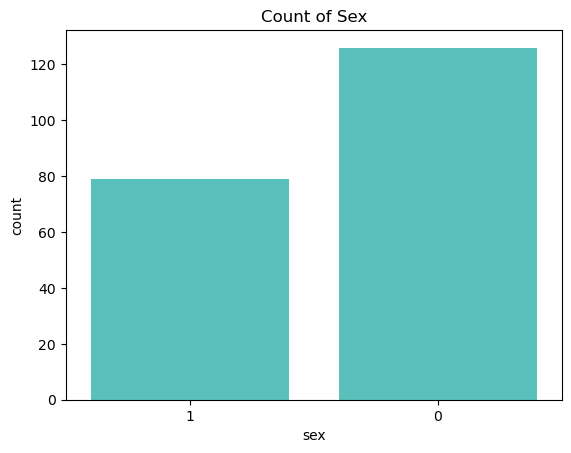

In [16]:
sns.countplot(x='sex', data=df, color='mediumturquoise')
plt.title('Count of Sex')

There were more female patients than male patients 

In [17]:
df['age'].describe()

count    205.000000
mean      52.463415
std       16.671711
min        4.000000
25%       42.000000
50%       54.000000
75%       65.000000
max       95.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Boxplot of Age')

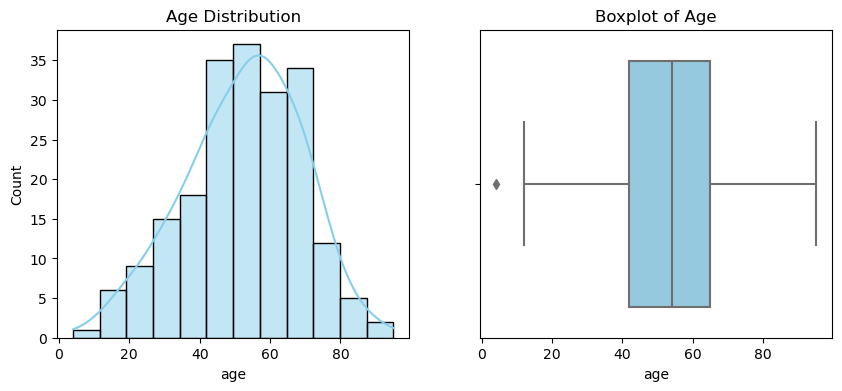

In [18]:
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x='age',data=df, kde=True, color='skyblue', ax=ax[0])
ax[0].set_title('Age Distribution')



sns.boxplot(x='age',data=df, color='skyblue', ax=ax[1])
ax[1].set_title('Boxplot of Age')

The age distribution is normal with a few outliers

In [19]:
yorder= df['year'].value_counts().sort_values().index
df['year'].value_counts(normalize=True)

year
1972    0.200000
1973    0.151220
1971    0.131707
1968    0.102439
1969    0.102439
1967    0.097561
1970    0.092683
1965    0.053659
1966    0.048780
1977    0.004878
1974    0.004878
1964    0.004878
1962    0.004878
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Count of Year')

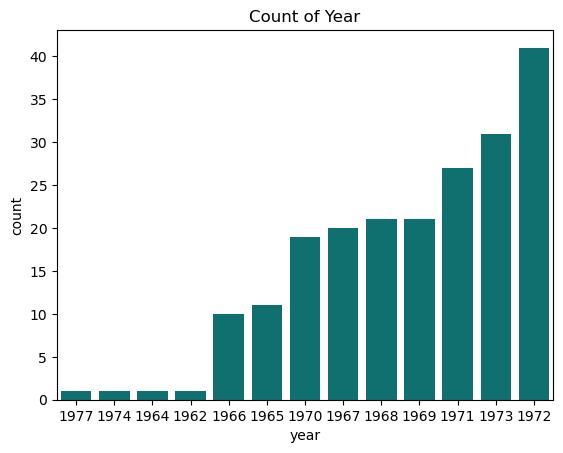

In [20]:
sns.countplot(x='year', data=df, color='teal', order=yorder)
plt.title('Count of Year')

The most surgeries were performed in 1972 followed by 1973 and 1971

In [21]:
df['thickness'].describe()

count    205.000000
mean       2.919854
std        2.959433
min        0.100000
25%        0.970000
50%        1.940000
75%        3.560000
max       17.420000
Name: thickness, dtype: float64

Text(0.5, 1.0, 'Boxplot of Thickness')

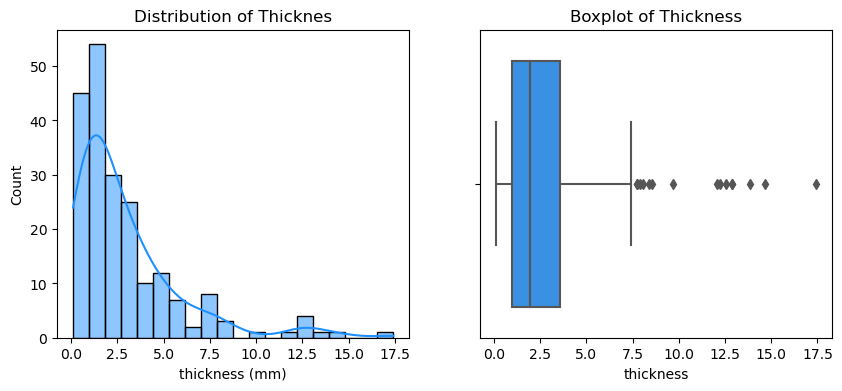

In [22]:
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x='thickness',data=df, kde=True, color='dodgerblue', ax=ax[0])
ax[0].set_title('Distribution of Thicknes')
ax[0].set_xlabel('thickness (mm)')



sns.boxplot(x='thickness',data=df, color='dodgerblue', ax=ax[1])
ax[1].set_title('Boxplot of Thickness')

The distribution of tumor thickness is skewed to the right and has some outliers

In [23]:
df['ulcer'].value_counts(normalize=True)

ulcer
0    0.560976
1    0.439024
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Count of Ulceration')

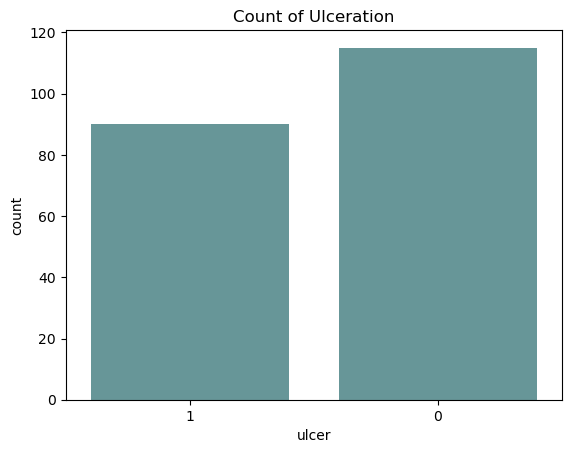

In [24]:
sns.countplot(x='ulcer', data=df, color='cadetblue')
plt.title('Count of Ulceration')

The number of patients without ulcer are more than those with ulcer

## Bivariate analysis

Text(0.5, 1.0, 'Ulcer vs Average Survival Time')

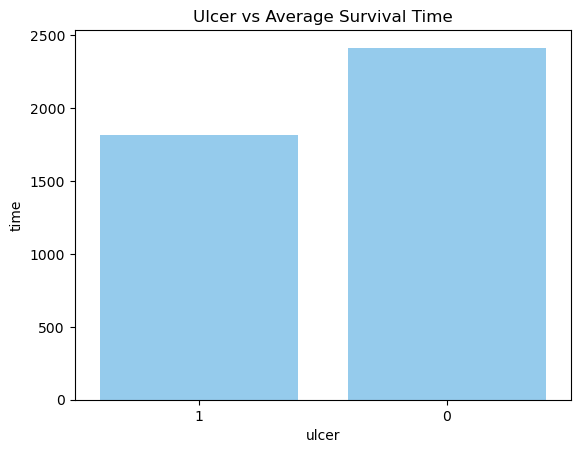

In [25]:
sns.barplot(x='ulcer', y='time', data=df, color='lightskyblue',errorbar=None)
plt.title('Ulcer vs Average Survival Time')

The graph shows average survival time was higher for the patients without ulceration than the patients with ulceration

Text(0.5, 1.0, 'Average Thickness vs Ulcer')

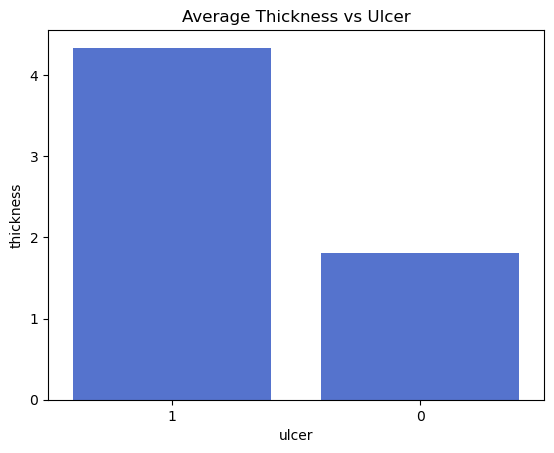

In [26]:
sns.barplot(x='ulcer', y='thickness', data=df, color='royalblue', errorbar=None)
plt.title('Average Thickness vs Ulcer')

This graph shows that the average tumor thickness of patients with ulcer is higher than that of patients without ulcer. 

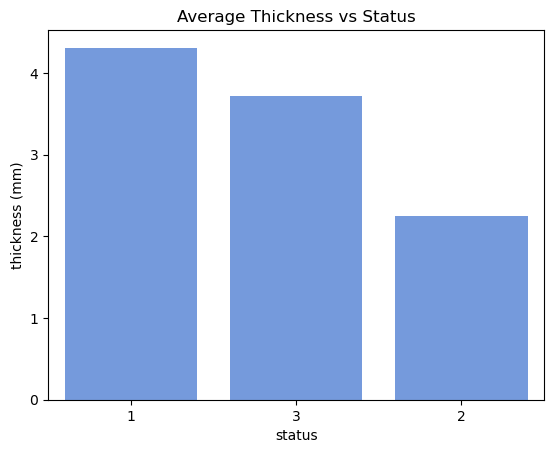

In [27]:
sns.barplot(x='status', y='thickness',data=df, color='cornflowerblue', order=['1','3','2'], errorbar=None)
plt.title('Average Thickness vs Status')
plt.ylabel('thickness (mm)')
plt.show()

The patients who died of melanoma had the highest average tumor thickness while the patients who are still alive have the least average tumor thickness.

Text(0.5, 1.0, 'Average Survival Time vs Status')

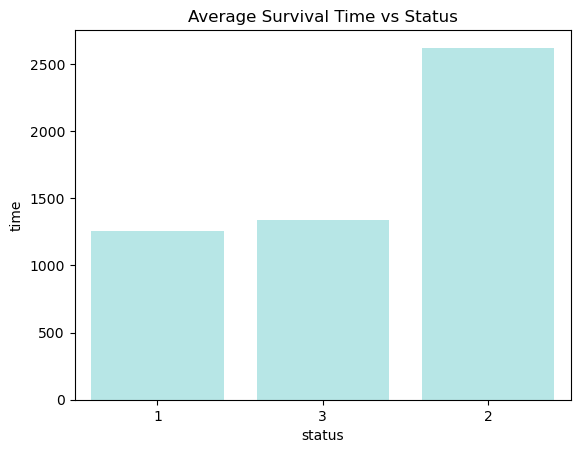

In [28]:
sns.barplot(x='status',y='time',data=df, order=['1','3','2'], color='paleturquoise',errorbar=None)
plt.title('Average Survival Time vs Status')

The average survival time of living patients is the highest whilst that of those who died of melanoma is the least.

Text(0.5, 1.0, 'Average Age vs Status')

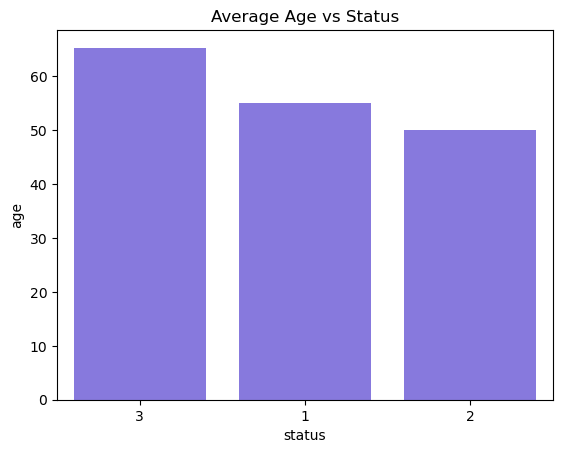

In [29]:
sns.barplot(x='status', y='age',data=df, order=sorder, color='mediumslateblue',errorbar=None)
plt.title('Average Age vs Status')


The graph shows that the average age of the patients who died of other causes was highest and the average age of patiens still living was the least.

Text(0.5, 1.0, 'Year vs Survival Time')

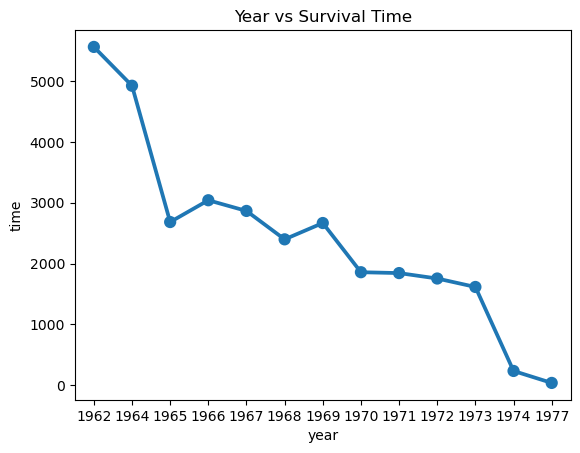

In [30]:
yearorder=df['year'].value_counts().sort_index().index
sns.pointplot(x='year', y='time', data=df, order=yearorder, errorbar= None)
plt.title('Year vs Survival Time')

The average survival time generally reduces as the years go by with the exception of 1965 and 1969 which shoot up before coming down again in consequent years. 

## Multivariate Analysis

Text(0.5, 1.0, 'Number of People with Ulcer per Status')

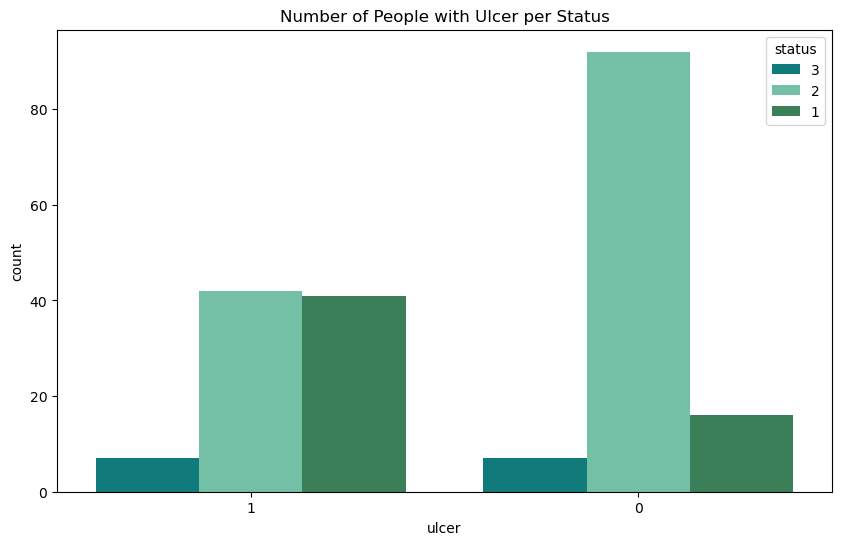

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='ulcer', hue='status', data=df, palette=['darkcyan', 'mediumaquamarine', 'seagreen'])
plt.title('Number of People with Ulcer per Status')

* The graph shows that the number of patients with ulcer who died due to melanoma are greater than those without ulcer.
* The graph shows that the number of patients with ulcer who are still alive are less than those without ulcer.

Text(0, 0.5, 'thickness (mm)')

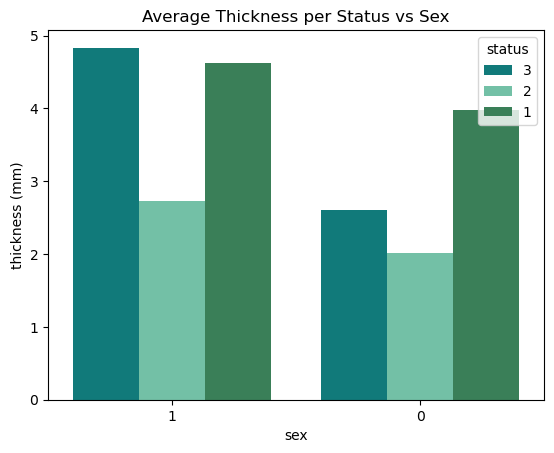

In [32]:
sns.barplot(x='sex', y='thickness', hue='status',\
            data=df,palette=['darkcyan', 'mediumaquamarine', 'seagreen'], errorbar=None)
plt.title('Average Thickness per Status vs Sex')
plt.ylabel('thickness (mm)')

This graph shows that the average tumor thickness of male patients were greater than female patients across all of their statuses

Text(0.5, 1.0, 'Average Survival Time per Sex by Status')

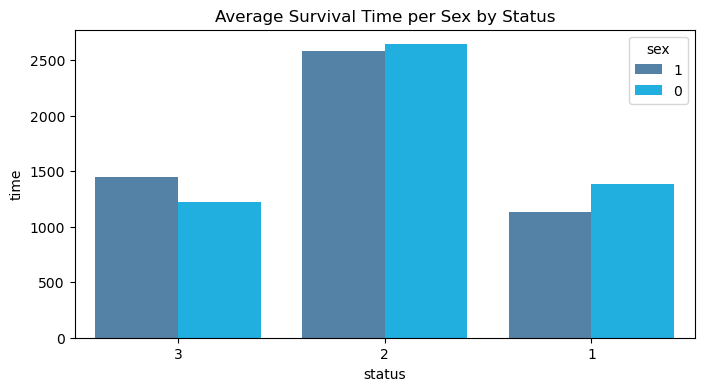

In [33]:
plt.figure(figsize=(8,4))
sns.barplot(x='status',y='time', hue='sex', data=df, palette=['steelblue','deepskyblue'], errorbar=None)
plt.title('Average Survival Time per Sex by Status')


* The average survival times of female patients who died of melanoma and who are still alive are greater than the male patients.
* However, the average survival time of female patients who died of other causes is less than the male patients.

Text(0.5, 1.0, 'Number of people per Sex vs Ulcer')

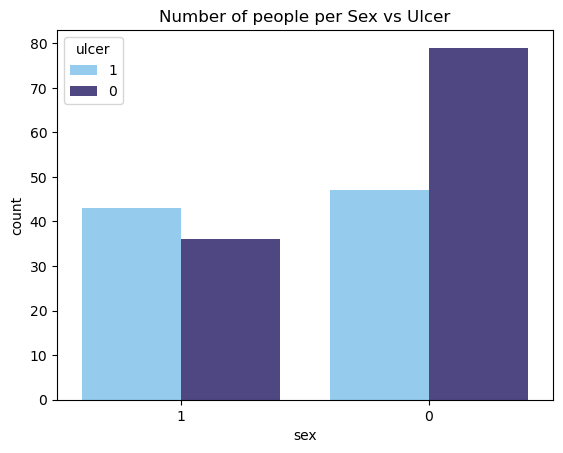

In [34]:
sns.countplot(x='sex', hue='ulcer', data=df, palette=['lightskyblue','darkslateblue'])
plt.title('Number of people per Sex vs Ulcer')

The graph shows that there are more female patients for both ulceration and no ulceration than male patients.

Text(0.5, 1.0, 'Year vs Survival Time')

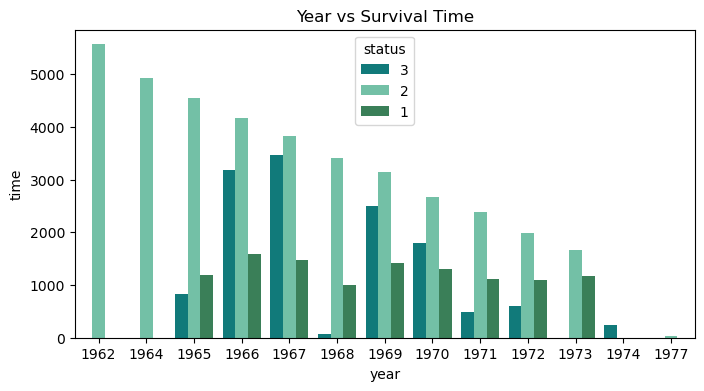

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(x='year', y='time', data=df, order=yearorder, hue='status',\
            palette=['darkcyan', 'mediumaquamarine', 'seagreen'],errorbar= None)
plt.title('Year vs Survival Time')

From this graph we see a steep increase in the deaths by other causes from the years before 1969 which may have caused the increase in survival time since the average survival time of those who died of other causes is higher than those who died of melanoma.

## Hypothesis Testing : T- Test (Ulceration and Survival Time)

#### This test seeks to show whether ulceration plays a significant role in the survival time of the patients.
* The null hypothesis: The average survival time of those without ulcer is equal to the average survival time of those wih ulcer.
* The alternative hypothesis: The average survival time of those without ulcer is greater than the average survival time of those wih ulcer.

Mathematically:

**Ho:** U0 = U1

**H1:** U0 > U1

**alpha=** 0.05

In [36]:
no_ulcer=df[(df['ulcer']=='0') & (df['status'] !='3')]['time']

In [37]:
no_ulcer.sample(10)

64     1648
100    1963
102    2005
123    2227
45     1499
204    5565
182    3667
52     1542
116    2104
115    2103
Name: time, dtype: int64

Text(0.5, 1.0, 'Boxplot of Survival Time Without Ulcer')

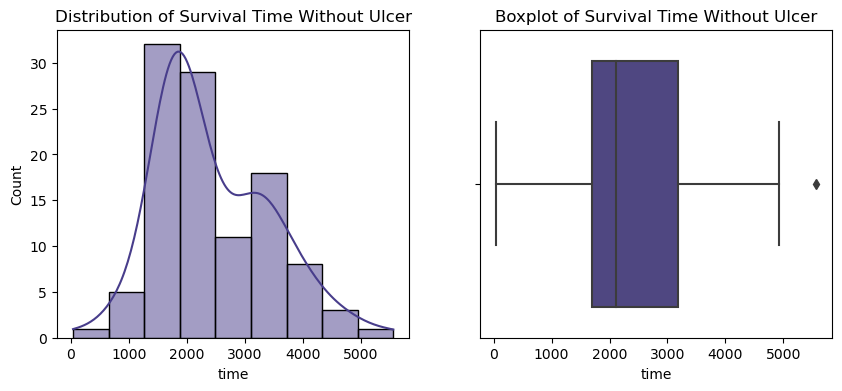

In [38]:
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x=no_ulcer, kde=True, color='darkslateblue', ax=ax[0])
ax[0].set_title('Distribution of Survival Time Without Ulcer')


sns.boxplot(x=no_ulcer,  color='darkslateblue', ax=ax[1])
ax[1].set_title('Boxplot of Survival Time Without Ulcer')

In [39]:
np.var(no_ulcer)

994600.6025377229

In [40]:
ulcer=df[(df['ulcer']=='1') & (df['status'] !='3')]['time']

Text(0.5, 1.0, 'Boxplot of Survival Time With Ulcer')

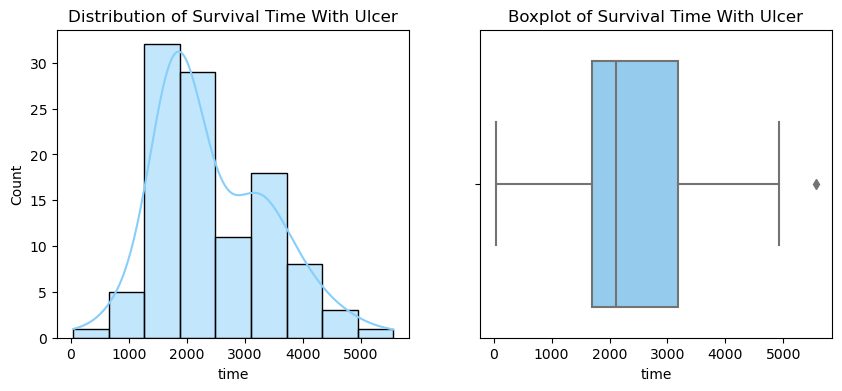

In [41]:
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x=no_ulcer, kde=True, color='lightskyblue', ax=ax[0])
ax[0].set_title('Distribution of Survival Time With Ulcer')


sns.boxplot(x=no_ulcer,  color='lightskyblue', ax=ax[1])
ax[1].set_title('Boxplot of Survival Time With Ulcer')

In [42]:
np.var(ulcer)

1271517.0323704456

In [43]:
#test for homogeneity of variance 
np.var(ulcer)/np.var(no_ulcer)

1.278419728608821

In [44]:
#conducting independent t-test
results1 = pingouin.ttest(x=no_ulcer, 
                              y=ulcer,
                              paired = False, 
                              alternative="greater")

In [45]:
results1

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.427872,164.481086,greater,0.000384,"[279.33, inf]",0.508574,68.008,0.966129


Since the p-value is less than the alpha value, i.e. 0.000384 < 0.05, the result is significant, thus we reject the null hypothesis.

We can therefore conclude that the average survival time of the patients without ulceration is greater than the average survival time of patients with ulceration.

## Hypothesis Testing : T- Test (Status and Thickness)

#### This test seeks to show whether tumor thickness plays a significant role in the status of the patients.
* The null hypothesis: The average tumor thickness for patients who died due to melanoma is equal to the average tumor thickness of patients who are still alive.
* The alternative hypothesis: The average tumor thickness for patients who died due to melanoma is greater than the average tumor thickness of patients who are still alive.

Mathematically:

**Ho:** U0 = U1

**H1:** U0 > U1

**alpha=** 0.05

In [46]:
mdeath=df[(df['status']=='1')]['thickness']

In [47]:
mdeath.sample(10)

36      3.87
136     2.26
111     3.06
33      6.44
34     14.66
117     1.76
57      0.81
142     3.54
110     2.26
148     1.94
Name: thickness, dtype: float64

Text(0.5, 1.0, 'Boxplot of Tumor Thickness (Death)')

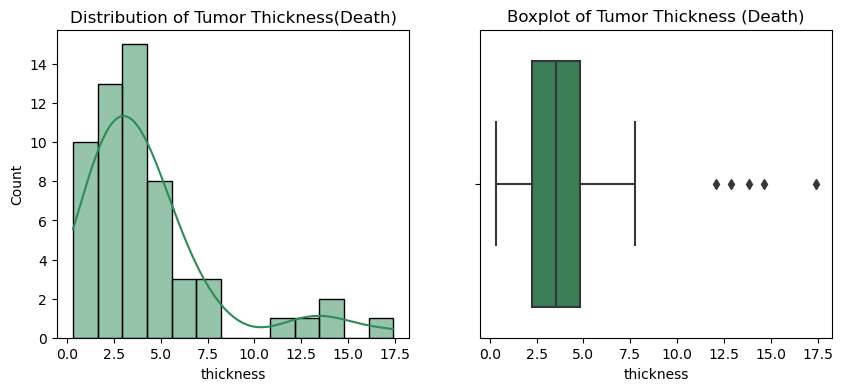

In [48]:
#checking for normality
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x=mdeath, kde=True, color='seagreen', ax=ax[0])
ax[0].set_title('Distribution of Tumor Thickness(Death)')


sns.boxplot(x=mdeath,  color='seagreen', ax=ax[1])
ax[1].set_title('Boxplot of Tumor Thickness (Death)')

In [49]:
alive=df[(df['status']=='2')]['thickness']

In [50]:
alive.sample(10)

75     2.58
128    0.97
87     0.32
162    0.48
184    1.03
200    7.06
48     1.94
195    1.94
168    0.81
137    1.45
Name: thickness, dtype: float64

Text(0.5, 1.0, 'Boxplot of Tumor Thickness (Death)')

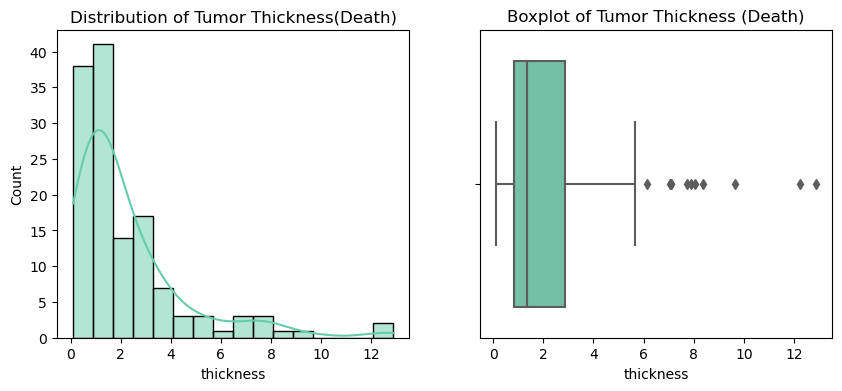

In [51]:
#checking for normality
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x=alive, kde=True, color='mediumaquamarine', ax=ax[0])
ax[0].set_title('Distribution of Tumor Thickness(Death)')


sns.boxplot(x=alive,  color='mediumaquamarine', ax=ax[1])
ax[1].set_title('Boxplot of Tumor Thickness (Death)')

In [52]:
np.var(mdeath)

12.548072576177281

In [53]:
np.var(alive)

5.370689089997773

In [54]:
#test for homogeneity of variance 
np.var(mdeath)/np.var(alive)

2.3363989919927546

In [55]:
#conducting independent t-test
results2 = pingouin.ttest(x=mdeath, 
                              y=alive,
                              paired = False, 
                              alternative="greater")

In [56]:
results2

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.018178,76.950463,greater,0.000068,"[1.21, inf]",0.749933,484.722,0.998967


Since the p-value is less than the alpha value, i.e. 0.000068 < 0.05, the result is significant, thus we reject the null hypothesis.

We can therefore conclude that the average tumor thickness for patients who died due to melanoma is greater than the average tumor thickness of patients who are still alive

## Hypothesis Testing : T- Test (Sex and Thickness)

#### This test seeks to show whether sex plays a significant role in the average tumor thickness of the patients.
* The null hypothesis: The average tumor thickness for male patients is equal to the average tumor thickness of female patients.
* The alternative hypothesis: The average tumor thickness for male patients is greater than the average tumor thickness of female patients.

Mathematically:

**Ho:** U0 = U1

**H1:** U0 > U1

**alpha=** 0.05

In [57]:
male =df[(df['sex']=='1')]['thickness']

In [58]:
male.sample(10)

88      4.84
36      3.87
114     1.13
44      3.22
0       6.76
197     2.10
17      7.06
110     2.26
15     12.56
43      1.29
Name: thickness, dtype: float64

Text(0.5, 1.0, 'Boxplot of Tumor Thickness (Male)')

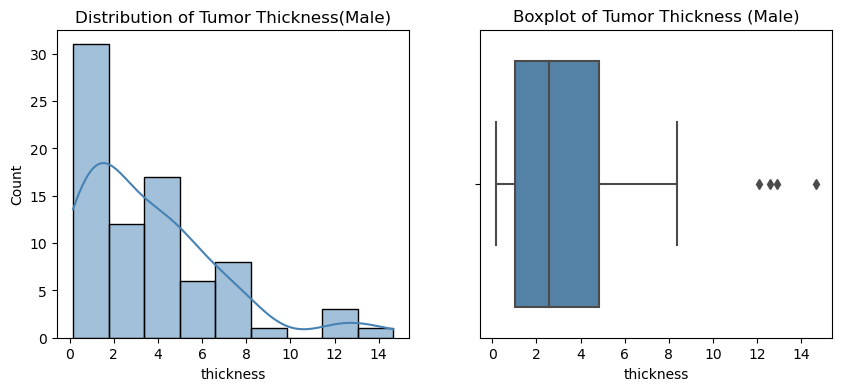

In [59]:
#checking for normality
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x=male, kde=True, color='steelblue', ax=ax[0])
ax[0].set_title('Distribution of Tumor Thickness(Male)')


sns.boxplot(x=male,  color='steelblue', ax=ax[1])
ax[1].set_title('Boxplot of Tumor Thickness (Male)')

In [60]:
female =df[(df['sex']=='0')]['thickness']

In [61]:
female.sample(10)

154    0.81
177    1.45
152    1.94
160    1.29
14     2.42
83     1.53
72     2.26
9      7.41
91     3.06
192    2.10
Name: thickness, dtype: float64

Text(0.5, 1.0, 'Boxplot of Tumor Thickness (Female)')

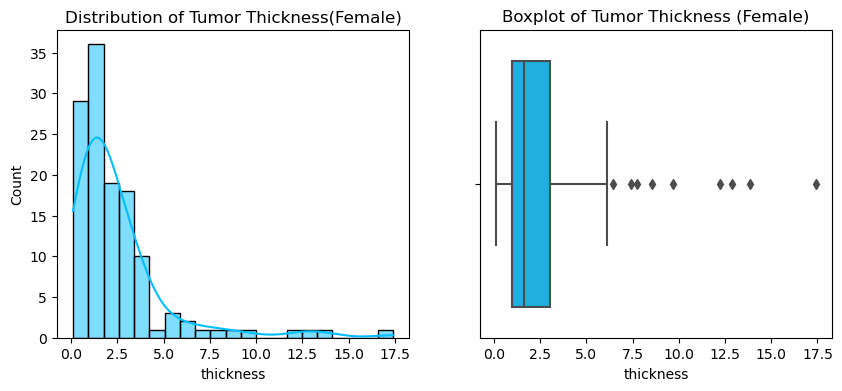

In [62]:
#checking for normality
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x=female, kde=True, color='deepskyblue', ax=ax[0])
ax[0].set_title('Distribution of Tumor Thickness(Female)')


sns.boxplot(x=female,  color='deepskyblue', ax=ax[1])
ax[1].set_title('Boxplot of Tumor Thickness (Female)')

In [63]:
np.var(male)

9.83253414516904

In [64]:
np.var(female)

7.527689625850339

In [65]:
#test for homogeneity of variance 
np.var(male)/np.var(female)

1.3061821931929536

In [66]:
results3 = pingouin.ttest(x=male, 
                              y=female,
                              paired = False, 
                              alternative="greater")

In [67]:
results3

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.605902,149.094279,greater,0.005046,"[0.41, inf]",0.3858,7.21,0.84955


Since the p-value is less than the alpha value, i.e. 0.005046 < 0.05, the result is significant, thus we reject the null hypothesis.

We can therefore conclude that the average tumor thickness for male patients is greater than the average tumor thickness for female patients

## Hypothesis Testing : T- Test (Sex and Survival Time)

#### This test seeks to show whether sex plays a significant role in the average survival time of the patients.
* The null hypothesis: The average survival time for female patients is equal to the average survival time of male patients.
* The alternative hypothesis: The average survival time for female patients is greater than the average survival time of male patients.

Mathematically:

**Ho:** U0 = U1

**H1:** U0 > U1

**alpha=** 0.05

In [68]:
femalesurvive=df[(df['sex']=='0') & (df['status'] !='3')]['time']

In [69]:
femalesurvive.sample(10)

69     1678
176    3441
139    2521
68     1667
202    4688
96     1942
183    3695
98     1956
9       279
152    3040
Name: time, dtype: int64

Text(0.5, 1.0, 'Boxplot of Survival Time (Female)')

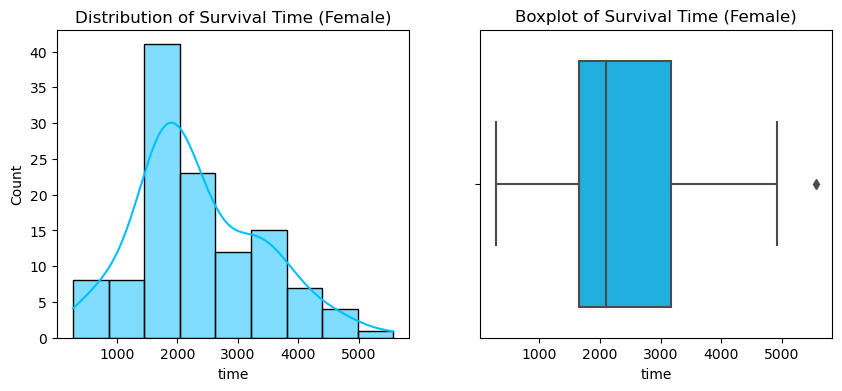

In [70]:
#checking for normality
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x=femalesurvive, kde=True, color='deepskyblue', ax=ax[0])
ax[0].set_title('Distribution of Survival Time (Female)')


sns.boxplot(x=femalesurvive,  color='deepskyblue', ax=ax[1])
ax[1].set_title('Boxplot of Survival Time (Female)')

In [71]:
malesurvive=df[(df['sex']=='1') & (df['status'] !='3')]['time']

In [72]:
malesurvive.sample(10)

31      967
62     1641
23      779
73     1710
109    2059
22      752
21      718
39     1228
200    4492
157    3144
Name: time, dtype: int64

Text(0.5, 1.0, 'Boxplot of Survival Time (Male)')

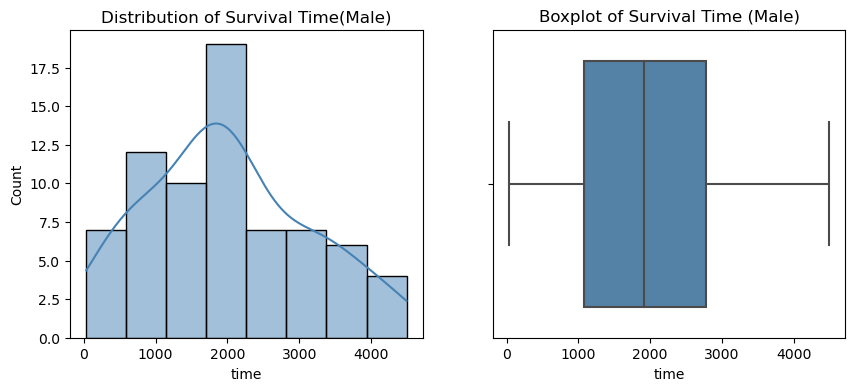

In [73]:
#checking for normality
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x=malesurvive, kde=True, color='steelblue', ax=ax[0])
ax[0].set_title('Distribution of Survival Time(Male)')


sns.boxplot(x=malesurvive,  color='steelblue', ax=ax[1])
ax[1].set_title('Boxplot of Survival Time (Male)')

In [74]:
np.var(femalesurvive)

1102498.3019560766

In [75]:
np.var(malesurvive)

1248697.3701774688

In [76]:
#test for homogeneity of variance 
np.var(malesurvive)/np.var(femalesurvive)

1.132607068838113

In [77]:
results4 = pingouin.ttest(x=femalesurvive, 
                              y=malesurvive,
                              paired = False, 
                              alternative="greater")

In [78]:
results4

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.138847,142.309167,greater,0.017078,"[79.3, inf]",0.324515,2.676,0.698764


Since the p-value is less than the alpha value, i.e. 0.017078 < 0.05, the result is significant, thus we reject the null hypothesis.

We can therefore conclude that the average survival time for female patients is greater than the average survival time for male patients

## Hypothesis Testing : T- Test (Ulcer and Thickness)

#### This test seeks to show whether ulcer plays a significant role in the average tumor thickness of the patients.
* The null hypothesis: The average tumor thickness for patients with ulcer is equal to the average tumor thickness of patients without ulcer.
* The alternative hypothesis: The average tumor thickness for patients with ulcer is greater than the average tumor thickness of patients without ulcer.

Mathematically:

**Ho:** U0 = U1

**H1:** U0 > U1

**alpha=** 0.05

In [79]:
no_ulcer_thick=df[(df['ulcer']=='0')]['thickness']

In [80]:
no_ulcer_thick.sample(10)

102    0.64
54     1.29
108    0.32
25     0.32
95     1.94
119    0.65
134    0.16
184    1.03
194    0.65
150    0.16
Name: thickness, dtype: float64

In [81]:
ulcer_thick=df[(df['ulcer']=='1')]['thickness']

In [82]:
ulcer_thick.sample(10)

142     3.54
40      3.87
15     12.56
140     7.89
42     17.42
200     7.06
38      1.34
104     3.22
125     2.26
41      3.54
Name: thickness, dtype: float64

Text(0.5, 1.0, 'Boxplot of Tumor Thickness (No Ulcer)')

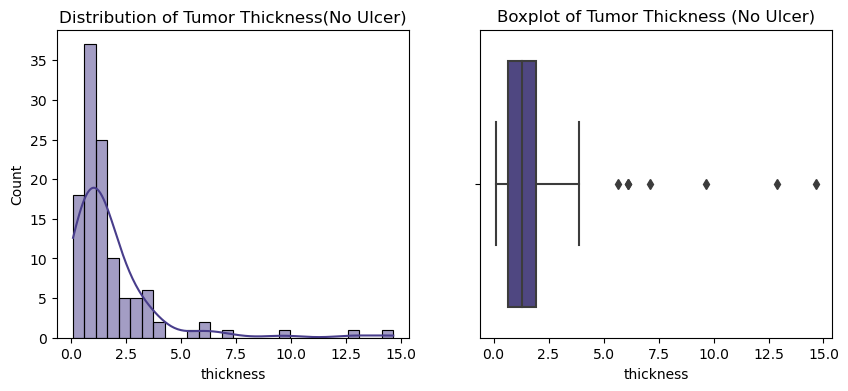

In [83]:
#checking for normality
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x=no_ulcer_thick, kde=True, color='darkslateblue', ax=ax[0])
ax[0].set_title('Distribution of Tumor Thickness(No Ulcer)')


sns.boxplot(x=no_ulcer_thick,  color='darkslateblue', ax=ax[1])
ax[1].set_title('Boxplot of Tumor Thickness (No Ulcer)')

Text(0.5, 1.0, 'Boxplot of Tumor Thickness (Ulcer)')

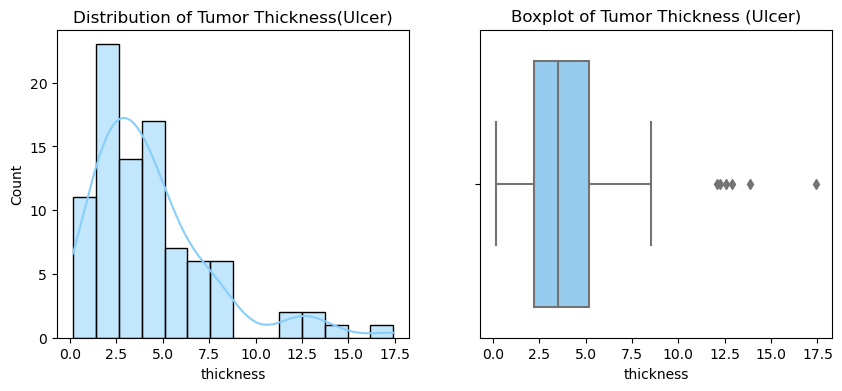

In [84]:
#checking for normality
fig, ax=plt.subplots(1,2, figsize=(10,4))

sns.histplot(x=ulcer_thick, kde=True, color='lightskyblue', ax=ax[0])
ax[0].set_title('Distribution of Tumor Thickness(Ulcer)')


sns.boxplot(x=ulcer_thick,  color='lightskyblue', ax=ax[1])
ax[1].set_title('Boxplot of Tumor Thickness (Ulcer)')

In [85]:
np.var(no_ulcer_thick)

4.7364322117202295

In [86]:
np.var(ulcer_thick)

10.22325433333333

In [87]:
#test for homogeneity of variance 
np.var(ulcer_thick)/np.var(no_ulcer_thick)

2.1584293570244797

In [88]:
#conducting independent t-test
results5 = pingouin.ttest(x=ulcer_thick, 
                              y=no_ulcer_thick,
                              paired = False, 
                              alternative="greater")

In [89]:
results5

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.38449,149.732809,greater,1.020813e-09,"[1.87, inf]",0.94,1.585e+07,1.0


Since the p-value is less than the alpha value, i.e. 1.020813e-09 < 0.05, the result is significant, thus we reject the null hypothesis.

We can therefore conclude that the average tumor thickness for patients with ulcer is greater than the average tumor thickness of without ulcer.

## Hypothesis Testing: Chi-Square (Ulceration vs Thickness)

#### This test seeks to show if there is a significant relationship between ulceration and thicknesss

**H0:** There is no association between the ulcer and thickness

**H1:** There is association between the ulcer and thickness 

**alpha** = 0.05

In [90]:
#separating tumor thickness into thin(<1), medium(>1 to <4), thick(>4) with info from theory
df['is_thick']= np.where(df['thickness']<1, 'thin', df['thickness'])
df['is_thick']=np.where(df['thickness']>4, 'thick', df['is_thick'])
df['is_thick']=np.where((df['thickness']>1)& (df['thickness']<4), 'medium', df['is_thick'])

In [91]:
df.head()

,time,status,sex,age,year,thickness,ulcer,is_thick
0,10,3,1,76,1972,6.76,1,thick
1,30,3,1,56,1968,0.65,0,thin
2,35,2,1,41,1977,1.34,0,medium
3,99,3,0,71,1968,2.90,0,medium
4,185,1,1,52,1965,12.08,1,thick


In [92]:
#crosstabulation
tab1 = pd.crosstab(index= df['ulcer'],columns=df['is_thick'])
tab1

is_thick,medium,thick,thin
ulcer,,,
0,57,7,51
1,47,38,5


In [93]:
from bioinfokit.analys import stat
results6 = stat()
results6.chisq(df=tab1)

In [94]:
print(results6.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       57.9154  2.65364e-13
Log-likelihood     2       65.3232  6.53488e-15



Since the p-value is less than the alpha value, we reject the null hypothesis.

We conclude that there is an association between ulceration and thickness.

From the two tests above, it is seen that average tumor thickness for patients with ulcer is greater than the average tumor thickness of without ulcer

## Hypothesis Testing: Chi-Square (Ulceration vs Status)

#### This test seeks to show if there is a significant relationship between ulceration and status

**H0:** There is no association between the ulcer and status

**H1:** There is association between the ulcer and status 

**alpha** = 0.05

In [95]:
#crosstabulation
tab2 = pd.crosstab(index= df['ulcer'],columns=df['status'])
tab2

status,1,2,3
ulcer,,,
0,16,92,7
1,41,42,7


In [96]:
results7 = stat()
results7.chisq(df=tab2)

In [97]:
print(results7.summary)


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2        26.974  1.38889e-06
Log-likelihood     2        27.406  1.11907e-06



Since the p-value is less than the alpha value, we reject the null hypothesis.

We conclude that there is an association between ulceration and status.

From the multivariate analysis above, it is seen that a greater number of patients without ulceration are still alive while a greater number of patients with ulceration died from melanoma.

## Hypothesis Testing: Chi-Square (Ulceration vs Sex)

#### This test seeks to show if there is a significant relationship between ulceration and sex

**H0:** There is no association between the ulcer and sex

**H1:** There is association between the ulcer and sex 

**alpha** = 0.05

In [98]:
#crosstabulation
tab3 = pd.crosstab(index= df['ulcer'],columns=df['sex'])
tab3

sex,0,1
ulcer,,
0,79,36
1,47,43


In [99]:
results8= stat()
results8.chisq(df=tab3)

In [100]:
print(results8.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       5.10989  0.0237898
Log-likelihood     1       5.10561  0.0238486



Since the p-value is less than the alpha value, we reject the null hypothesis.

We conclude that there is an association between ulceration and sex.

From the bivariate analysis above, it is seen that the female patients without ulcer are significantly greater than the number of male patients without ulcer, as compared to female patients with ulcer and male patients with ulcer. 

This might be because the female patients are greater than the male patients who underwent the surgery.